# 基于房价预测项目的线性回归

## 探索数据的思路

通过统计知识以及可视化工具结合进行探索
1. 清晰的认识和定义目标，围绕目标进行分析
2. 理解已经拥有数据的分布特征，每一列的数据都具备特殊的代表意义
3. 能够刻画出每个特征与目标之间的关系，抉择出最重要的特征
4. 能够知道特征与特征之间的关联性

In [12]:
# 导入相关的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


** 项目数据介绍 **
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* <span class="girk">LotArea: Lot size in square feet</span>
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* <span class="girk">YearBuilt: Original construction date</span>
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* <span class="girk">1stFlrSF: First Floor square feet</span>
* <span class="girk">2ndFlrSF: Second floor square feet</span>
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

--------------------------------
给定房屋的一些属性信息，预测该房屋的销售价格

In [3]:
df_train = pd.read_csv('train.csv')

## 了解数据

搞清楚已有数据的类型，离散还是连续。

同时根据一些业务经验或者常识判断出某些重点的特征，比如：

* YearBuilt 建筑的年份
* TotalBsmtSF，GrLivArea 建筑的位置相关等
* LotArea 建筑面积

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## 分析目标

目标是预测salePrice,通过给定的特征和数据，来预测销售价格。首先探索目标值是如何分布的，有哪些特征等！

In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

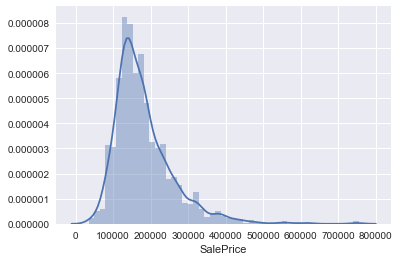

In [11]:
sns.distplot(df_train['SalePrice'])

## 和目标相关的特征

**皮尔森相关系数**是用来反映两个变量线性相关程度的统计量。相关系数用r表示，其中n为样本量，分别为两个变量的观测值和均值。r描述的是两个变量间线性相关强弱的程度。r的绝对值越大表明相关性越强。
![p](https://gss0.bdstatic.com/-4o3dSag_xI4khGkpoWK1HF6hhy/baike/s%3D250/sign=74e74b02d42a283447a6310e6bb4c92e/7aec54e736d12f2ead86f57f4fc2d56285356829.jpg)

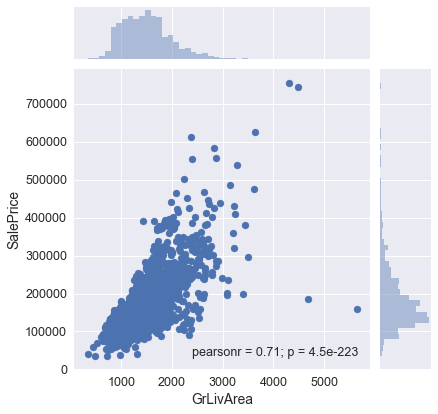

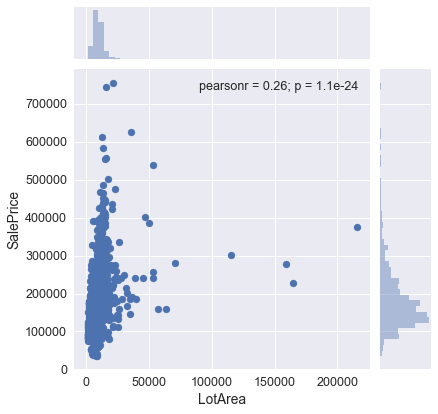

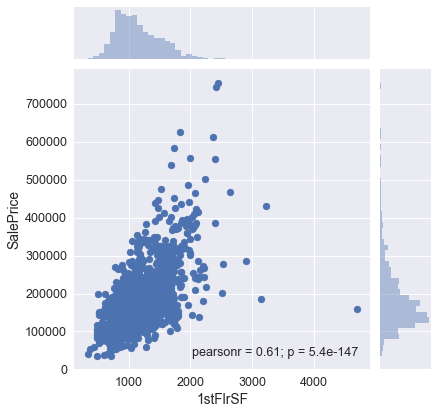

In [97]:
sns.jointplot(x = "GrLivArea",y = 'SalePrice',data = df_train)
sns.jointplot(x = "LotArea",y = 'SalePrice',data = df_train)
sns.jointplot(x = "1stFlrSF",y = 'SalePrice',data = df_train)

从上面的图形和数据可以看出，GrLivArea与SalePrice相关性较高，其它两个测试因子相关性较低。 但：相关性不能表明因果关系，既 GrLivArea与SalePrice相关性较高能够表明GrLivArea的变化能够带来SalePrice的变化，但是不能表明GrLivArea是SalePrice产生的原因！

也可通过seaborn提供的线性回归的作图方式来查看相关性：

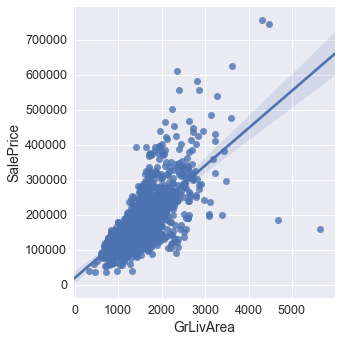

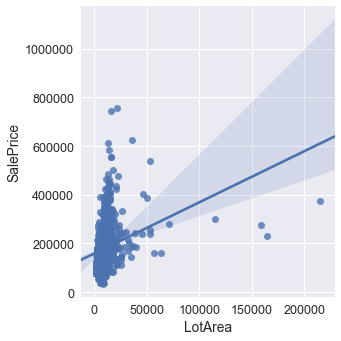

In [94]:
sns.lmplot(x = "GrLivArea",y = 'SalePrice',data = df_train)
sns.lmplot(x = "LotArea",y = 'SalePrice',data = df_train)

**目标变量与分类变量的关系**

可以通过观察在每一个分类值上 目标变量数据的变动程度来查看其相关性，在不同值上数据范围变化浮动较大，说明两者之间存在相关性，分类变量的不同取值会对目标变量产生影响

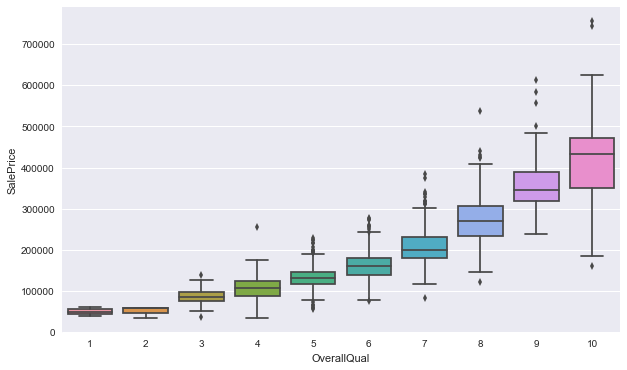

In [23]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df_train)

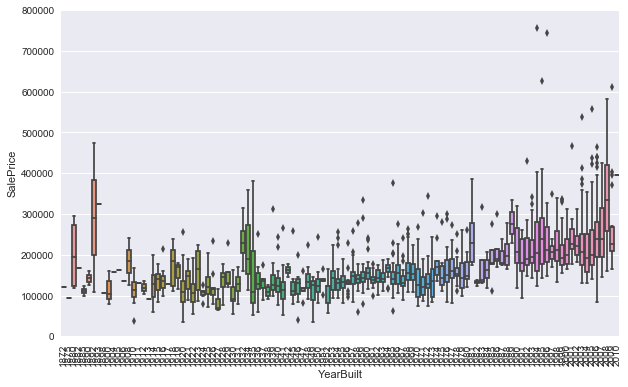

In [11]:
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

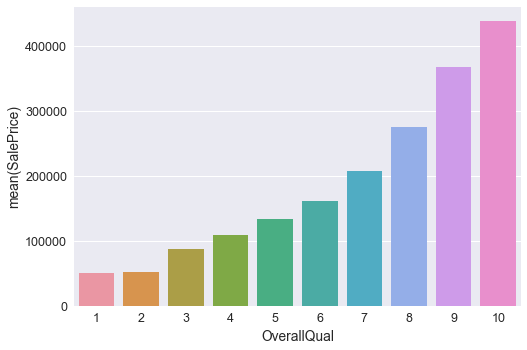

In [77]:
grouped = df_train.groupby('OverallQual')
g1 = grouped["SalePrice"].mean()
df1 = g1.reset_index('OverallQual')
sns.barplot(x = "OverallQual",y = "SalePrice",data = df1)

很明显可以看出，OverallQual的不同取值会对SalePrice造成影响，因为在不同分类值上，目标变量的数据分布区别较大

## 系统的客观的分析

围绕着目标变量，系统的对整个数据集进行分析，挑选出重要的特征

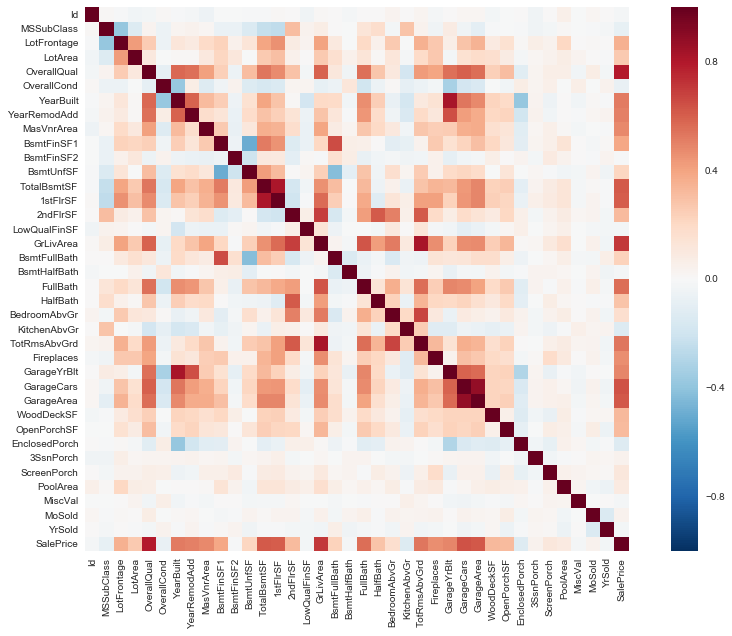

In [13]:
corrmatrix = df_train.corr()
sns.heatmap(corrmatrix,square=True,vmax=1.0)

heatmap可从全局的角度快速的观察变量之间的相关性。

图中第一块是TotalBsmtSF与1stFlrSF，第二块是与Garage相关的变量。可以看出这些变量之间存在着相关性，这意味着对于目标变量来说，它们是共线性的，只取其中一个即可

还可以单独观察SalePrice与其它所有变量之间的相关性

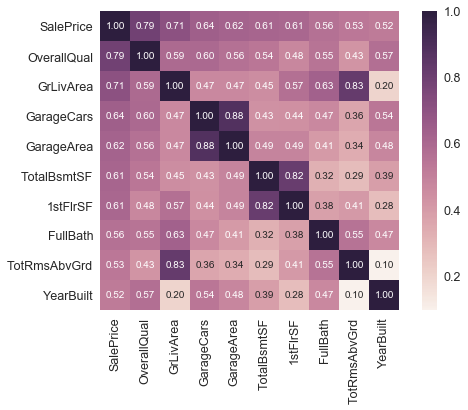

In [18]:
k =10 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

<span class="burk">结论：</span>
1. 'OverallQual', 'GrLivArea' , 'TotalBsmtSF' 这三个变量与 'SalePrice'有很强的线性关系
2. 'GarageCars' 和 'GarageArea'与'SalePrice'有很强的线性关系；但是它们两个之间共线了，因此只需要任取一个即可！不妨取GarageCars，因为它与目标的关联性更强一点
3. 'TotalBsmtSF' 和 '1stFloor' 存在共线，只取TotalBsmtSF；'TotRmsAbvGrd' 和 'GrLivArea',共线，只取 GrLivArea
4. 还有两个FullBath，YearBuilt


基于以上的分析，对一些关联性较强的特征做深入分析！

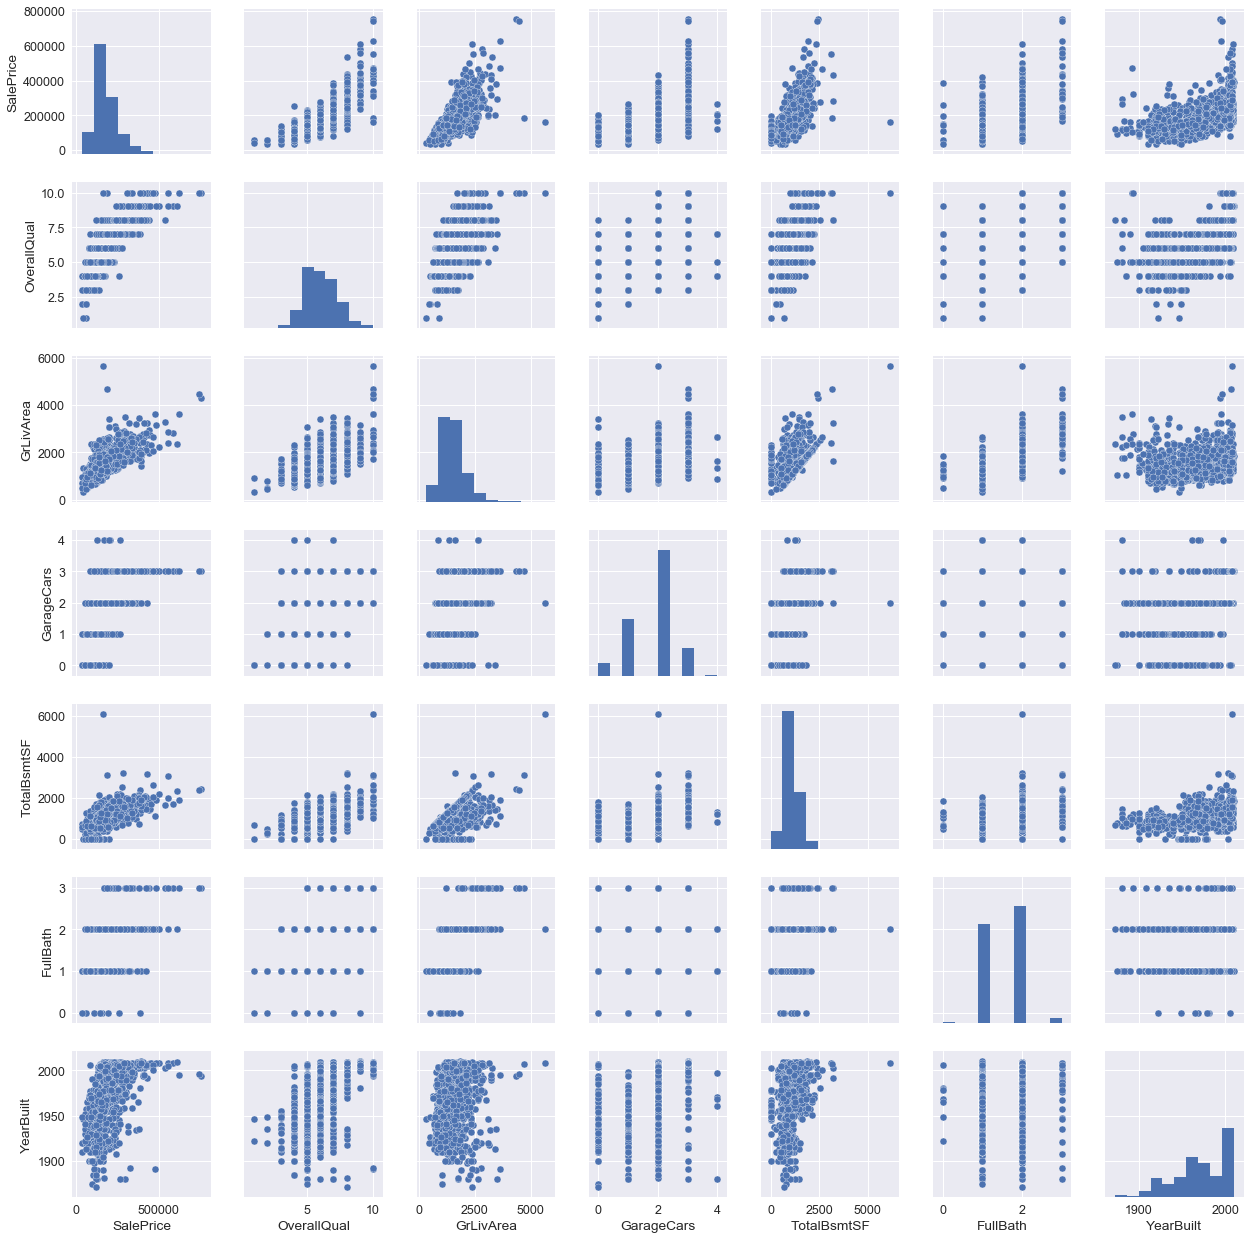

In [24]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'] # 关联性较强的特征
sns.pairplot(df_train[cols], size = 2.5)

## Missing Value
处理缺失值

In [20]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Linear Regression

In [35]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

lr_model = ols("SalePrice~C(OverallQual) +GrLivArea +C(GarageCars) + TotalBsmtSF +C(FullBath) + YearBuilt",data =df_train ).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     328.6
Date:                Sat, 25 Aug 2018   Prob (F-statistic):               0.00
Time:                        18:18:27   Log-Likelihood:                -17310.
No. Observations:                1459   AIC:                         3.466e+04
Df Residuals:                    1439   BIC:                         3.477e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7.815e+05 

# 使用筛选后的特征，直接使用随机森林，不经过任何调参，效果已经远好于线性回归

In [73]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
gbdt = RandomForestRegressor()
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].values
y = df_train['SalePrice'].values
gbdt.fit(X,y)

predict_values = gbdt.predict(X)

print(r2_score(y,predict_values))


0.9693520054777971

